<a href="https://colab.research.google.com/github/L-1996-G/test/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

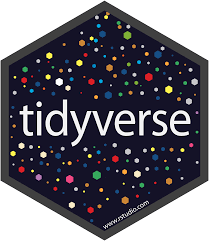

[Tidyverse](https://www.tidyverse.org/)

In [ ]:
install.packages("tidyverse")

In [ ]:
library(tidyverse)
library(lubridate)

# Part 1: სვეტებზე ოპერაციები 

#### **მონაცემთა შემოტანა და ცვლადების ტიპების ცვლილება**

In [ ]:
getwd()
setwd('/content')
df = read_csv('tidy_df.csv') 

In [ ]:
glimpse(df)

##### მონაცემთა შემოტანის დროს შევცვალოთ ცვლადების ტიპები:

In [ ]:
df = read_csv(
  'tidy_df.csv',
col_type = cols(
  Region = col_factor(),
  Date = col_date('%d/%m/%Y'),
  Tech = col_factor(),
  #Var_2 = col_skip(), არ შემოიტანს Var_2 ცვლადს 
  Var_1 = col_number()
)
)

glimpse(df)

##### **Pipe (`%>%`) ოპერატორი**
Pipe ოპერატორით გამოიყენება იმისათვის, რომ არგუმენტი მიეწოდოს ფუნქციას. მისი საშუალებით ჩაწერილი კოდი პირობითად ორ ნაწილად შეიძლება გაიყოს. `%>%`-ის მარჯვნივ დგას ფუნქცია, ხოლო მარცხნივ - არგუმენტი; მაშასადამე


*   `function(X)` არის იგივე, რაც `X %>% function()`
*   `function_2(function_1(X))` არის იგივე, რაც:


```
X %>% 
function_1() %>% 
function_2()
```





ალტერნატიული მეთოდი სვეტების ტიპის ცვლილების

In [ ]:
df <- df %>% mutate_if(is.character, as.factor) #თუ ყველა character-ის გადაყვანა გვინდა factor-ად
df$Region <- as.factor(df$Region)  # თუ მხოლოდ ერთის ცვლადის ტიპის შეცვლა გვინდა
str(df$Bank)
str(df$Region)

#### **სვეტების არჩევა: Select() ფუნქცია**
ხშირად, data.frame-ში არსებული ყველა სვეტი ჩვენთვის საინტერესო არ არის. მონაცემებთან მუშაობის გასამარტივებლად უმჯობესია მხოლოდ საინტერესო სვეტებით ახალი `data.frame`/`tibble`-ის შექმნა. მთლიანი data.frame-დან რამდენიმე ცვლადის შერჩევა შესაძლებელია `select()` ფუნქციის საშუალებით:

In [ ]:
df %>%
select(Date, Bank, RoU, ass) %>%
slice_sample(n=3)

როდესაც ჩვენთვის საინტერესოა ცვლადების უმრავლესობა, მაშინ უმჯობესია არაგამოყენებადი ცვლადების გამორიცხვა `select()`-ისა და `-` ოპერატორის საშუალებით:

In [ ]:
df %>% select(-c(Region, Loun)) %>%
slice_sample(n=4)

`select()`-თან ერთად გამოიყენება დამხმარე ფუნქციები:

*   `contains()`
*   `starts_with()`
*   `ends_with()`
მათი გამოყენება მოსახერხებელია, როდესაც გვინდა შევარჩიოთ ისეთი ცვლადები, რომელთა დასახელებებში ფიგურირებს საერთო სიმბოლოები. დავუშვათ გვინდა შევარჩიოთ ყველა ცვლადი რომელიც შეიცავს `s` სიმბოლოს (შეიძლება დაგვჭირდეს, მაგალითად, `date`-ის შემცველი ცვლადების არჩევა):



In [ ]:
df %>% 
select(contains('s'))%>%
slice_sample(n=3)

In [ ]:
# შევარჩიოთ ცვლადი, რომელიც იწყება `a` სიმბოლოთი
df %>% select(starts_with('a')) %>%
slice_sample(n=3)

##### **სევეტებისთვის ადგილების შეცვლა: relocate()**
`select()` ფუნქციის საშუალებით, ასევე, შესაძლებელია სვეტების გადაჯგუფება იმგვარად, რომ ჩვენთვის საინტერესო სვეტები მოექცნენ სასურველ ადგილას. დავუშვათ ჩვენ გვსურს `Date`, `Bank`, `Depusit` და `ass` ცვლადები მოექცნენ თავში, ხოლო შემდეგ მნიშვნელობა აღარ აქვს სვეტების დალაგებას. ამის გაკეთება შესაძლებელია შემდეგი სინტაქსით:

In [ ]:
df %>% select(Date, Bank, Depusit, ass, everything())%>% # everything() ყველა დანარცენ ცვლადს გადაიტანს ass-ის შემდეგ
slice_sample(n=4)

სვეტების მოძრაობა ასევე შესაძლებელია `relocate` ფუნქციის საშუალებით, რომელსაც შემდეგი სახის სინტაქსი აქვს:


```
relocate(.data, ..., .before = NULL, .after = NULL)
```

დავუშვათ გვსურს `RoU` ცვლადის გაანალიზება დროით ჭრილში. უმჯობესი იქნება თუ ამ ცვლადს მოვახვედრებთ `Date` ცვლადის წინ ან შემდეგ:

In [ ]:
df %>%
relocate(RoU, .after = Date) %>%
slice_sample(n=3)


ზოგჯერ ჩვენთვის მნიშვნელოვანია რაიმე ტიპის ცვლადების არჩევა, მაგალითად, მხოლოდ რიცხვითი ცვლადების ან ფაქტორული ცვლადების. ეს შესაძლებელია `select` ფუნქციის, `where`-ისა და `is.*` არგუმენტის საშუალებით, სადაც `*`-ის ნაცვლად ჩვენთვის სასურველი ტიპია ნაგულისხმევი. ავირჩიოთ მხოლოდ რიცხვითი ცვლადები:

In [ ]:
df %>% 
select(where(is.numeric)) %>%
summary()

##### **ცვლადებისათვის სახელების შეცვლა: rename()**
ცვალდებისათვის სახელების შეცვლა შესაძლებელია `rename` ფუნქციის საშუალებით

In [ ]:
df <- df %>%
  rename(Int_inc = Var_1, 
         Ass = ass ) 
df %>%
  slice_sample (n = 3)

#### **ახალი ცვლადების შექმნა**


##### **სახელის შეცვლა Transmute ფუნქციის საშუალებით**
თუ გვაინტერესებს მხოლოდ ახალი ცვლადი მაშინ გამოვიყენებთ `transmute` ბრძანებას:

In [ ]:
df %>% 
transmute(new_CIT_1 = CIT_1*100) %>%
slice_sample(n=3)

##### **Mutate() ფუნქცია**
`Mutate` ფუნქცია საშუალებას იძლევა ორიგინალ ცვლადებზე მანიპულაციით შევქმნათ ახალი ცვლადები. იგი ხშირად იხმარება `select()` ფუნქციასთან ერთად. სინტაქსი შემდეგია:


```
df %>% mutate(new_col = some_operation)
```


 მაგალითად, თუ სვეტი გამოსახულია ათწილადებში და გვინდა მათი პროცენტების სახით წარმოდგენა, შეგვიძლია სვეტი გავამრავლოთ 100-ზე:

In [ ]:
df %>% 
mutate(CIT_1 = CIT_1*100) %>%
slice_sample(n=3)

###### **სვეტებში სახელების ცვლილება: recode() ფუნქცია**
ზოგჯერ ფაქტორების სახელები ზემდეტად ბევრ ინფორმაციას შეიცავენ, რომლის განზოგადება შესაძლებელია ჩვენთვის საინტერესო ინფორმაციის შენარჩუნების პირობით. ბევრი სიმბოლოს შემცველი ფაქტორები პრობლემას ქმნიან მონაცემთა ანალიზის, განსაკუთრებით ვიზუალიზაციის დროს. R-ში შესაძლებელია ფაქტორების სახელის გადარქმევა `mutate` და `recode` ფუნქციბის საშუალებით. განვიხილოთ მაგალითი:

In [ ]:
#რადგან ჩვენ მონაცემებში ასეთი პრობლემა არ არსებობს, ჯერ ხელოვნურად "დავაბინძუროთ მონაცემები"
df$Tech <- as.character(df$Tech)
df$Tech <- ifelse(df$Bank=="bank1" & df$Tech=='Add', 'Add_new_branch_in_Tbilisi', df$Tech) 
df %>% slice_head(n=7)

დავუშვათ, ანალიზისათვის ჩვენ გვაინტერესებს დაემატა თუ არა ახალი ფილიალი, ხოლო სად დაემატა ეს ჩვენთვის მნიშვნელოვანი არ არის. ამიტომ თუ `Add_new_branch_in_Tbilisi`-ს ჩავანაცვლებთ `Add`-ით ამით ინფორმაცია არ დაიკარგება. განვახორციელოთ ეს `mutate` და `recode` ფუნქციების საშუალებით:

In [ ]:
df = df %>%
mutate(Tech = recode(Tech, #პირველი Tech არის ახალი ცვლადის სახელი, ხოლო მეორე მიუთითებს თუ რომელი ცვლადი უნდა შეიცვალოს
  "Add_new_branch_in_Tbilisi" = "Add" # ჯერ იწერება ძველი სახელი, შემდეგ ახალი
))
df %>% slice_sample(n=7)
df$Tech = as.factor(df$Tech)

###### **შეცდომების იდენტიფიცირება `mutate` და `nchar`-ის საშუალებით**
დავუშვათ ვიცით, რომ რომელიმე სვეტში სიმბოლოების რაოდენობა არ უნდა აღემატებოდეს რაიმე n მნიშვნელობას და გვაქვს ეჭვი, რომ ეს მოთხოვნა დარღვეულია და ინფორმაცია არასწორად არის მოწოდებული. R-ში ამ პრობელმის იდენტიფიცირება შესაძლებელია `mutate` და `nchar` ფუნქციების საშუალებით.`nchar`-ს იგივე შინაარსი აქვს, რაც ექსელში `LEN` ფუნქციას, ანუ ითვლის სიმბოლოების რაოდენობას. 
მაგალითად, ვიცით, რომ სიმბოლოების რაოდენობა `CIT_1` ცვლადში არ უნდა იყოს 8-ზე მეტი. გადავამოწმოთ, სწორად არის თუ არა შეყვენილი ყველა სიმბოლო:

In [ ]:
# ხელოვნურად შევცვალოთ მონაცემები
df[2:5,4] <- 9999999.888

df %>% 
mutate(CIT_len = nchar(CIT_1))%>% # შევქმნათ ახალი ცვლადი, რომელიც დაითვლის სიმბოლოებს
filter(CIT_len>8) # ვნახოთ ის მონაცემები, სადაც სიმბოლოთა რაოდენობა აღემატება დასაშვებ ნორმას

##### **If_else & case_when ფუნქციები**
პირობაზე დაფუძვნებული ახალი ცვლადების შესაქმნელად ხშირად გამოიყენება `if_else` ბრძანება. მას დაახლოებით იგივე ფუნქცია აქვს, რაც excel-ის `IF` ფუნქციას. მისი გამოყენება მოსახერხებელია რაოდენობრივი ცვლადის კატეგორიულ ცვლადად გარდაქმნისათვის. `case_when` ფუნქცია მსგავსია `if_else` ფუნქციის, თუმცა მისი გამოყენება უმჯობესია, როდესაც მრავალი კატეგორიის შექმნა გვინდა. სინტაქსი ასე მოიცემა:


```
if_else(condition1, True, False)
```



In [ ]:
summary(df$Depusit)
# if_else-ის გამოყენება ორ კატეგორიანი ახალი ცვლადის შესაქმნელად
df %>% 
mutate(cat_dep = ifelse(Depusit>1758, 'high','low')) %>%
slice_sample(n=3)

თუ ჩვენ გვინდა, მაგალითად, ხუთი კატეგორიის შექმნა, მაშინ დაგვჭირდება ოთხი ifelse პირობის ჩაწერა. ასეთ შემთხვევაშ უმჯობესია case_when-ის გამოყენება:

In [ ]:
df %>% mutate(cat_dep = case_when(
Depusit < 1600 ~ "very low",
Depusit >=1600 & Depusit <1700 ~ "low",
Depusit >1800 & Depusit <= 1950 ~ "high",
Depusit > 1950 ~ "very high",
TRUE ~ "average"
)) %>%
slice_sample(n=10)


##### **ცვლადების გაყოფა/გაერთიანება**
ზოგჯერ განსხვავებული ინფორმაციის ცვლადები გაერთიანებულია წარმოდგენილია ერთ ცვლადად და შეერთებულია რაიმე სიმბოლოთი (მაგ: Bank1_RoU). არსებობს საპირისპირო შემთხვევაც, როდესაც ერთი შინაარსის ცვლადი გაშლილია რამდენიმე ცვალდში (მაგ: year, month, day ცალ-ცალკეა მოცემული). R-ში `separate()` და `unite` ფუნქციების საშუალებით შეგვიძლია მარტივად გადავჭრათ, შესაბამისად, გაყოფისა და გაერთიანების პრობლემები. სინტაქსი შემდეგია: 


```
*  unite(data, col, ..., sep = "_", remove = TRUE)
*  separate(data, col, into, sep = "", remove = TRUE)
```



In [ ]:
A = df %>% 
unite(col = bank_rou, c('Bank', 'RoU'), sep = '_' ) 
A %>% slice_sample(n=3)

In [ ]:
A %>% 
separate(bank_rou, into = c('Bank', 'RoU'), remove=T) %>%
slice_sample(n=3)

# Part 2: სტრიქონებზე ოპერაციები

#### **მონაცემთა სორტირება: arrange() ფუნქცია**

In [ ]:
df %>% arrange(desc(ass),RoU) %>% #ჯერ დაალაგებს ass-ის მიხედვით კლებადობით, შემდეგ RoU-ს მიხედვით ზრდადობით
slice_head(n=5)

#### **მონაცემთა ფილტრაცია: filter() ფუნქცია**



1.   ფილტრაცია თარიღის მიხედვით




In [ ]:
df %>% filter(Date < ymd(20140101)) %>% # ymd() ფუნქცია lubridate პაკეტიკად, არგუმენტს გადაიყვანს დროით ფორმატში
arrange(CIT_1) %>%
slice_tail(n=3)



2.   ფილტრაცია ფაქტორების მიხედვით



In [ ]:
df %>% filter(Bank == "bank3") %>%
arrange(desc(RoU)) %>%
slice_tail(n=3)



3.   ფილტრაცია რამდენიმე არგუმენტის მიხევით



In [ ]:
df %>% filter(Bank=="bank2" & RoU>4.3)%>%
arrange(RoU) %>%
slice_head(n=3)

##### **`%in%` ოპერატორი და `%not_in%` ოპერატორი**
`%in%` ოპერატორი გამოყენებით ერთი ვექტორიდან ვირჩევთ მხოლოდ იმ ელემენტებს, რომელიც მეორე ვექტორს მიეკუთვნება. მას სხვადასხვა გამოყენება აქვს, თუმცა ჩვენ გამოვიყენებთ ფილტრაციის პროცესში. 

In [ ]:
A <- df %>% 
filter(Bank %in% c('bank1', 'bank2'))
unique(A$Bank)

ზოგჯერ ჩვენთვის სასურველი კატეგორიების რაოდენობა იმდენად დიდია, რომ მათი ცალ-ცალკე ჩამოწერა არაეფექტურია. ასეთ შემთხვევაში უმჯობესია გამოვიყენოთ  `%not_in%` (not include შინაარსის) ოპერატორი. სამწუხაროდ, ასეთი ოპერატორი არ არსებობს, მაგრამ მისი შექმნა ძალიან მარტივადაა შესაძლებელი `%in%`-ის განეგატიურებით:

In [ ]:
'%not_in%' <- Negate('%in%') # გავანეგატიუროთ %in% ოპერატორი

ახლა კი შეგვიძლია მისი გამოყენება:

In [ ]:
A <- df %>% filter(Region %not_in% c('East'))
unique(A$Region)

 ##### **filter_at() ფუნქცია**
  თუ ერთად რამდენიმე ცვლადის ფილტრაცია გვინდა მაშინ შესაძლოა მოსახერხებელი იყოს `filter_at()` ფუნქციის გამოყენება. პირველ არგუმენტად ვუთითებთ რომელი ცვლადების მიხედვით უნდა მოხდეს ფილტრაცია, ხოლო მეორე არგუმენტად ვუთითებთ ფილტრაციის კრიტერიუმს. თუ მეორე არგუმენტად მითითებულია `all_vars`, მაშინ ორივე არგუმენტმა უნდა დააკმაყოფილოს პირობა, ხოლო თუ მიეთითება `any_vars`, მაშინ მხოლოდ ერთ-ერთის დაკმაყოფილებაც საკმარისია

In [ ]:
df %>% 
filter_at(vars(RoU, ass), all_vars(. < 3.9 )) %>%
slice_head(n=4)

#### **დაჯგუფება და შეჯამება: group_by() & summarise()**
`group_by` ფუნქცია მთლიან მონაცემებს აჯგუფებს მითითებული არგუმენტის კატეგორიების მიხედვით, ხოლო `summarise()` ფუნქცია თითოული ჯგუფისათვის ითვლის რაიმე სტატისტიკას.

In [ ]:
# დავითვალოთ ბანკების მიხედვით საშუალო CIT_1
df %>% group_by(Bank)%>%
summarise(mean_CIT = mean(CIT_1))

დაჯგუფება შესაძლებელია რამდენიმე არგუმენტის მიხევით. მაგალითად, დავაჯგუფოთ Bank-ისა და Region-ის მიხედვით და დავითვალოთ Ass-ის საშუალო:

In [ ]:
df %>% group_by(Bank, Region)%>%
summarise(mean_Ass = mean(Ass, na.rm = T))

დავითვალოთ ბანკების მიხედვით რამდენი ახალი ოფისი  დაემატა 2016 წლის შემდეგ:

In [ ]:
df %>% filter(Date>ymd(20151231)) %>% # დავიტოვოთ მონაცემები 2015 წლის შემდეგ
group_by(Bank, Tech)%>% # დავაჯგუფოთ ბანკების და ტექნიკური განახლების სტატუსის მიხედვით
drop_na() %>% # გამოტოვებული მონაცამები ამოვაგროთ
summarise(count = n()) # n()-ის საშუალებით დავითვალოთ თითოულ ჯგუფში სტრიქონების რაოდენობა

დაჯგუფების შემდეგ, ასევე, შესაძლებელია რამდენიმე შეჯამების ერთდროულად დათვლა:


In [ ]:
df %>% group_by(Bank)%>%
summarise(
  mean_Ass = mean(Ass, na.rm = T), 
  max_RoU = max(RoU),
  sd_CIT_1 = sd(CIT_1)
)

#### ერთდროული ოპერაციები მრავალ სვეტზე: across ფუნქცია
თუ ერთი და იგივე შეჯამება გვაინტერესებს მრავალ სვეტზე მაშინ `across` ფუნქცია დაგვეხმარება. `across` სჭირდება 2 არგუმენტი - სვეტების სახელები და ფუნქცია. საბაზისო სინტაქსი შემდეგია:


```
across(.cols, .fns)
```



In [ ]:
df %>% select( RoU, Ass ) %>%
summarise(across(.cols=c(RoU, Ass), .fns = mean, na.rm = T)) # na.rm = T დაზუსტება გვჭირდება,
# რადგან გამოტოვებული დაკვირვების დროს ვერ ხდება სტატისტიკის დათვლა

სვეტების ასარჩევად შეგვიძლია გამოვიყენოთ `where(is.*)` ფუნქცია, სადაც * სვეტების ტიპს აღნიშნავს. მაგ. დავითვალოთ ყველა რიცხვითი ცვლადის საშუალო და სტანდარტული გადახრა:

In [ ]:
df %>%
summarise(
  across(where(is.numeric), c(mean, sd), na.rm = T))

როგორც ვხედავთ ცვლადების დასახელებები საკმაოდ არაინფორმაციულია. დასახელებებში სტატისტიკების აღსანიშნად შემოტანილი ციფრები შეგვიძლია შევცვალოთ სტატისტიკების სახელებით და ამით ცხრილი უფრო ინფორმაციული გავხადოთ. ამისათვის საკმარისია ჩვენთვის საინტერესო სტატისტიკაბი ჩავსვათ list()-ში და დავარქვათ სახელი:

In [ ]:
df %>%
summarise(
  across(where(is.numeric), list(ave=mean, std=sd), na.rm = T))

მიღებული სახელები გაცილებით ინფორმაციულია.

`across` ფუნქციის ხშირად გამოიყენება `group_by`-სთან ერთად. განვიხილოთ  მაგალითი:

In [ ]:
df %>% group_by(Bank) %>%
summarise(
  across(where(is.numeric), list(ave=mean, std=sd), na.rm = T))